In [3]:
suppressWarnings(library(tidyverse))
suppressWarnings(library(testthat))
suppressWarnings(library(digest))
suppressWarnings(library(repr))
suppressWarnings(library(caret))
suppressWarnings(install.packages("GGally"))
suppressWarnings(library(GGally))

also installing the dependencies ‘progress’, ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [26]:
# reading in our data
red_wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                    delim=";")
white_wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", 
                    delim=";")

# eliminating whitespace in column names
names(red_wine) <- gsub(" ","_", names(red_wine))
names(white_wine) <- gsub(" ","_", names(white_wine))


# combining our two wine data sets
wine <- bind_rows(list(white = white_wine , red = red_wine), .id = "type")

head(wine)
tail(wine)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_integer(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col                  expected               actual file                 expected   <int> <chr>                <chr>                  <chr>  <chr>                actual 1  1296 total sulfur dioxide no trailing characters .5     'https://archive.ic… file 2  1297 total sulfur dioxide no trailing characters .5     'https://archive.ic…
”Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),

type  fixed_acidity volatile_acidity citric_acid residual_sugar chlorides
1 white 7.0           0.27             0.36        20.7           0.045    
2 white 6.3           0.30             0.34         1.6           0.049    
3 white 8.1           0.28             0.40         6.9           0.050    
4 white 7.2           0.23             0.32         8.5           0.058    
5 white 7.2           0.23             0.32         8.5           0.058    
6 white 8.1           0.28             0.40         6.9           0.050    
  free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates alcohol
1 45                  170                  1.0010  3.00 0.45       8.8   
2 14                  132                  0.9940  3.30 0.49       9.5   
3 30                   97                  0.9951  3.26 0.44      10.1   
4 47                  186                  0.9956  3.19 0.40       9.9   
5 47                  186                  0.9956  3.19 0.40       9.9   
6 30                   97                  0.9951  3.26 0.44      10.1   
  quality
1 6      
2 6      
3 6      
4 6      
5 6      
6 6

type fixed_acidity volatile_acidity citric_acid residual_sugar chlorides
1 red  6.8           0.620            0.08        1.9            0.068    
2 red  6.2           0.600            0.08        2.0            0.090    
3 red  5.9           0.550            0.10        2.2            0.062    
4 red  6.3           0.510            0.13        2.3            0.076    
5 red  5.9           0.645            0.12        2.0            0.075    
6 red  6.0           0.310            0.47        3.6            0.067    
  free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates alcohol
1 28                  38                   0.99651 3.42 0.82       9.5   
2 32                  44                   0.99490 3.45 0.58      10.5   
3 39                  51                   0.99512 3.52 0.76      11.2   
4 29                  40                   0.99574 3.42 0.75      11.0   
5 32                  44                   0.99547 3.57 0.71      10.2   
6 18                  42                   0.99549 3.39 0.66      11.0   
  quality
1 6      
2 5      
3 6      
4 6      
5 5      
6 6

In [101]:
quality_distribution <- ggplot(wine, aes(x = quality)) +
    xlab("Count") +
    ylab("Quality") +
    geom_bar(stat="count", aes(fill = type)) +
    geom_text(stat='count', aes(label=..count..), vjust=-(1/2))
    

# src:https://stackoverflow.com/questions/26553526/how-to-add-frequency-count-labels-to-the-bars-in-a-bar-graph-using-ggplot2/26556180

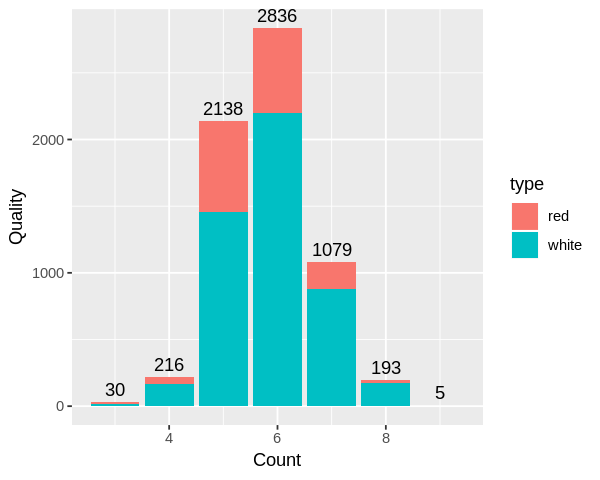

In [103]:
options(repr.plot.width=5,repr.plot.height=4)
quality_distribution

In [116]:
wine_explore <- select(wine, -type)
glimpse(wine)

# Should type be included in this ggpairs plot? Right now it's selected out using columns
# Or should we be treating red and white the same and ignore type
ggpair_plot <- wine %>%
            ggpairs(mapping = aes(color = type, alpha=1/10), columns = 2:13)

correlations <- wine %>%
                ggcorr(label = TRUE, label_round = 2, columns = 2:13)

# TODO: map correlations color onto ggpair plot

# src: https://stackoverflow.com/questions/45873483/ggpairs-plot-with-heatmap-of-correlation-values

Observations: 6,497
Variables: 13
$ type                 <chr> "white", "white", "white", "white", "white", "...
$ fixed_acidity        <dbl> 7.0, 6.3, 8.1, 7.2, 7.2, 8.1, 6.2, 7.0, 6.3, 8...
$ volatile_acidity     <dbl> 0.27, 0.30, 0.28, 0.23, 0.23, 0.28, 0.32, 0.27...
$ citric_acid          <dbl> 0.36, 0.34, 0.40, 0.32, 0.32, 0.40, 0.16, 0.36...
$ residual_sugar       <dbl> 20.70, 1.60, 6.90, 8.50, 8.50, 6.90, 7.00, 20....
$ chlorides            <dbl> 0.045, 0.049, 0.050, 0.058, 0.058, 0.050, 0.04...
$ free_sulfur_dioxide  <dbl> 45, 14, 30, 47, 47, 30, 30, 45, 14, 28, 11, 17...
$ total_sulfur_dioxide <dbl> 170, 132, 97, 186, 186, 97, 136, 170, 132, 129...
$ density              <dbl> 1.0010, 0.9940, 0.9951, 0.9956, 0.9956, 0.9951...
$ pH                   <dbl> 3.00, 3.30, 3.26, 3.19, 3.19, 3.26, 3.18, 3.00...
$ sulphates            <dbl> 0.45, 0.49, 0.44, 0.40, 0.40, 0.44, 0.47, 0.45...
$ alcohol              <dbl> 8.8, 9.5, 10.1, 9.9, 9.9, 10.1, 9.6, 8.8, 9.5,...
$ quality         

Warning message in ggcorr(., label = TRUE, label_round = 2, columns = 2:13):
“data in column(s) 'type' are not numeric and were ignored”Warning message:
“Ignoring unknown parameters: columns”

In [ ]:
options(repr.plot.width=10,repr.plot.height=10)

ggpair_plot

correlations

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning

In [ ]:
# TODO: Will probably plot all the variables vs quality here and then compare the RMSE and see
# if our exploratory predicted most important variables have a low RMSE, comfirming/disproving hypothesis..

options(repr.plot.width=5.5,repr.plot.height=4.5)

alcohol_plot <- ggplot(wine, aes(x = quality, y = alcohol)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Quality") + 
    ylab("Alcohol (%)") +
    ggtitle("Alcohol vs Quality")
alcohol_plot